# OBLIGATORIO BIG DATA

## Sistema de análisis de información de compañías bajo Big data

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("companies_analysis").getOrCreate()

In [2]:
from pyspark.sql.types import  (StructType, 
                                StructField, 
                                DateType, 
                                BooleanType,
                                DoubleType,
                                IntegerType,
                                StringType,
                               TimestampType)
from pyspark.sql.functions import col, max, min

In [3]:
import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

Creamos el dataframe de compañías

In [4]:
companies = spark.read.csv("companies_sorted.csv", header = True) 

Vemos cuántos registros tiene

In [5]:
print(" The companies dataframe has {} records".format(companies.count()))

 The companies dataframe has 7173419 records


Vemos las columnas

In [6]:
companies.columns

['id',
 'name',
 'domain',
 'year founded',
 'industry',
 'size range',
 'locality',
 'country',
 'linkedin url',
 'current employee estimate',
 'total employee estimate']

In [7]:
# Casteo de datos

In [8]:
companies.dtypes

[('id', 'string'),
 ('name', 'string'),
 ('domain', 'string'),
 ('year founded', 'string'),
 ('industry', 'string'),
 ('size range', 'string'),
 ('locality', 'string'),
 ('country', 'string'),
 ('linkedin url', 'string'),
 ('current employee estimate', 'string'),
 ('total employee estimate', 'string')]

In [9]:
companies = companies.withColumn('id', (companies.id).cast('Integer'))\
                     .withColumn("year founded", (col("year founded").cast('Integer')))\
                     .withColumn("current employee estimate", (col("current employee estimate").cast('Integer')))\
                     .withColumn("total employee estimate", (col("total employee estimate").cast('Integer')))\


In [10]:
companies.dtypes

[('id', 'int'),
 ('name', 'string'),
 ('domain', 'string'),
 ('year founded', 'int'),
 ('industry', 'string'),
 ('size range', 'string'),
 ('locality', 'string'),
 ('country', 'string'),
 ('linkedin url', 'string'),
 ('current employee estimate', 'int'),
 ('total employee estimate', 'int')]

In [11]:
companies.select("size range").show(10, truncate = False)

+----------+
|size range|
+----------+
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
|10001+    |
+----------+
only showing top 10 rows



In [12]:
companies.printSchema() #comprobamos los cambios

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- domain: string (nullable = true)
 |-- year founded: integer (nullable = true)
 |-- industry: string (nullable = true)
 |-- size range: string (nullable = true)
 |-- locality: string (nullable = true)
 |-- country: string (nullable = true)
 |-- linkedin url: string (nullable = true)
 |-- current employee estimate: integer (nullable = true)
 |-- total employee estimate: integer (nullable = true)



## Ingeniería de atributos

In [13]:
companies_limited = companies.limit(1000000)
companies_pandas = companies_limited.toPandas() #Creamos este dataframe pandas para mejor visualización de datos

In [14]:
companies_pandas

,id,name,domain,year founded,industry,size range,locality,country,linkedin url,current employee estimate,total employee estimate
0,5872184,ibm,ibm.com,1911.0,information technology and services,10001+,"new york, new york, united states",united states,linkedin.com/company/ibm,274047,716906
1,4425416,tata consultancy services,tcs.com,1968.0,information technology and services,10001+,"bombay, maharashtra, india",india,linkedin.com/company/tata-consultancy-services,190771,341369
2,21074,accenture,accenture.com,1989.0,information technology and services,10001+,"dublin, dublin, ireland",ireland,linkedin.com/company/accenture,190689,455768
3,2309813,us army,goarmy.com,1800.0,military,10001+,"alexandria, virginia, united states",united states,linkedin.com/company/us-army,162163,445958
4,1558607,ey,ey.com,1989.0,accounting,10001+,"london, greater london, united kingdom",united kingdom,linkedin.com/company/ernstandyoung,158363,428960
5,3844889,hewlett-packard,hpe.com,1939.0,information technology and services,10001+,"palo alto, california, united states",united states,linkedin.com/company/hewlett-packard-enterprise,127952,412952
6,2959148,cognizant technology solutions,cognizant.com,1994.0,information technology and services,10001+,"teaneck, new jersey, united states",united states,linkedin.com/company/cognizant,122031,210020
7,5944912,walmart,walmartcareers.com,1962.0,retail,10001+,"withee, wisconsin, united states",united states,linkedin.com/company/walmart,120753,272827
8,3727010,microsoft,microsoft.com,1975.0,computer software,10001+,"redmond, washington, united states",united states,linkedin.com/company/microsoft,116196,276983
9,3300741,at&t,att.com,1876.0,telecommunications,10001+,"dallas, texas, united states",united states,linkedin.com/company/at&t,115188,269659


In [15]:
companies_pandas.describe() #vemos la descripción estadística de los datos numéricos

,id,year founded,current employee estimate,total employee estimate
count,1.000000e+06,669313.000000,1000000.000000,1000000.000000
mean,3.582905e+06,1988.361762,89.463195,207.210511
std,2.072636e+06,30.351703,946.201613,2333.596528
min,1.600000e+01,1451.000000,8.000000,8.000000
25%,1.785064e+06,1982.000000,11.000000,22.000000
50%,3.580350e+06,1998.000000,18.000000,41.000000
75%,5.379693e+06,2008.000000,41.000000,97.000000
max,7.173415e+06,2029.000000,274047.000000,716906.000000


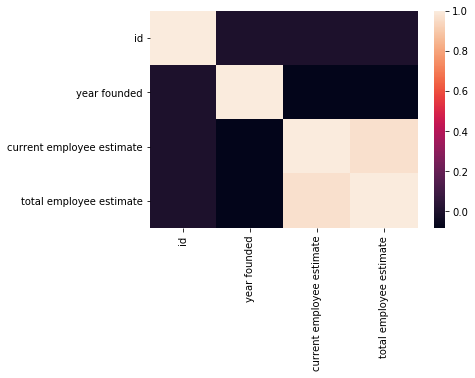

In [16]:
#hacemos un mapa de calor para ver las correlaciones entre los atributos que tenemos
corr = companies_pandas.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values) 

In [17]:
#Otra forma de ver la correlación, no solo con colores sino con los valores de cada correlación.

cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,id,year founded,current employee estimate,total employee estimate
id,1,-0.0014,-0.00063,-0.00083
year founded,-0.0014,1,-0.082,-0.084
current employee estimate,-0.00063,-0.082,1,0.97
total employee estimate,-0.00083,-0.084,0.97,1


Vemos que las columnas "total employee estimate" y "current employee estimate" están muy relacionadas. Por lo tanto, nos quedamos solamente con la segunda columna.

In [18]:
companies = companies.drop(col("total employee estimate"))

In [19]:
# También borramos la columna id porque no aporta info
companies = companies.drop(col("id"))

In [20]:
companies.columns

['name',
 'domain',
 'year founded',
 'industry',
 'size range',
 'locality',
 'country',
 'linkedin url',
 'current employee estimate']

## Consultas

### Determinar cuál es la industria principal considerando todos los países

In [21]:
# Agrupamos el dataset por industria, y observamos la cantidad de empresas por industria
count_per_industry = companies.groupBy("industry").count()

In [22]:
count_per_industry.show()

+--------------------+------+
|            industry| count|
+--------------------+------+
|aviation & aerospace| 17925|
|glass, ceramics &...|  5588|
|     pharmaceuticals| 36813|
|recreational faci...| 13870|
|     defense & space| 10278|
|     broadcast media| 29824|
|             fishery|  2355|
|          publishing| 44375|
|           utilities| 18803|
|          veterinary| 14860|
|         think tanks|  8203|
|          automotive|104143|
|industrial automa...| 26795|
|packaging and con...| 15719|
|        law practice| 81632|
|               dairy|  3119|
|         warehousing|  7628|
|health, wellness ...|145671|
|railroad manufacture|  1818|
|           wholesale| 45378|
+--------------------+------+
only showing top 20 rows



In [23]:
from pyspark.sql.functions import max

In [24]:
# Calculamos cuántas empresas tiene la industria con más empresas
count_industry_with_more_companies = count_per_industry.agg({"count" : "max"}).collect()[0][0]

In [25]:
print("La industria con más empresas tiene {} empresas".format(count_industry_with_more_companies))

La industria con más empresas tiene 453044 empresas


In [26]:
# Calculamos cual es la industria con más empresas a nivel mundial
count_per_industry.where((count_per_industry["count"] == count_industry_with_more_companies)).show()

+--------------------+------+
|            industry| count|
+--------------------+------+
|information techn...|453044|
+--------------------+------+



#### => La industria con más empresas es "Information technology and services"

### Determinar cuál es la industria principal en Uruguay

In [27]:
# Primero nos quedamos con las empresas de Uruguay
uruguay_companies = companies.where((companies["country"] == "uruguay"))

In [28]:
# Observamos cuántas empresas en el dataset son de Uruguay
uruguay_companies.count()

3036

In [29]:
# Agrupamos las empresas por industria
count_per_industry_in_uruguay = uruguay_companies.groupBy("industry").count()
count_per_industry_in_uruguay.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace|    1|
|     pharmaceuticals|   17|
|recreational faci...|    4|
|     broadcast media|   25|
|             fishery|    1|
|           utilities|    5|
|          publishing|    7|
|          veterinary|    2|
|         think tanks|    3|
|          automotive|   20|
|industrial automa...|   11|
|packaging and con...|    6|
|        law practice|   16|
|               dairy|    1|
|         warehousing|    2|
|health, wellness ...|   32|
|           wholesale|   25|
|environmental ser...|   10|
|         real estate|   98|
| program development|   33|
+--------------------+-----+
only showing top 20 rows



In [30]:
# Calculamos cuántas empresas tiene la industria con más empresas en Uruguay
count_industry_with_more_companies_in_uruguay = count_per_industry_in_uruguay.agg({"count" : "max"}).collect()[0][0]

In [31]:
print("La industria con más empresas en Uruguay tiene {} empresas".format(count_industry_with_more_companies_in_uruguay))

La industria con más empresas en Uruguay tiene 344 empresas


In [32]:
# Calculamos cual es la industria con más empresas en Uruguay
count_per_industry_in_uruguay.where((count_per_industry_in_uruguay["count"] == count_industry_with_more_companies_in_uruguay)).show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|information techn...|  344|
+--------------------+-----+



#### => La industria con más empresas en Uruguay es "Information technology and services"

### Determinar cuál es la industria principal en Estados Unidos

In [33]:
# Primero nos quedamos con las empresas de Estados Unidos
american_companies = companies.where((companies["country"] == "united states"))

In [34]:
# Observamos cuántas empresas en el dataset son de Estados Unidos
american_companies.count()

2278866

In [35]:
# Agrupamos las empresas por industria
count_per_industry_in_usa = american_companies.groupBy("industry").count()
count_per_industry_in_usa.show()

+--------------------+-----+
|            industry|count|
+--------------------+-----+
|aviation & aerospace| 7265|
|glass, ceramics &...| 1529|
|     pharmaceuticals|10775|
|recreational faci...| 6524|
|     defense & space| 5520|
|     broadcast media| 8091|
|             fishery|  756|
|           utilities| 6302|
|          publishing|12582|
|          veterinary| 8837|
|         think tanks| 2009|
|          automotive|39140|
|industrial automa...| 6576|
|packaging and con...| 4935|
|        law practice|37903|
|               dairy| 1129|
|         warehousing| 4090|
|health, wellness ...|57433|
|railroad manufacture|  507|
|           wholesale|14321|
+--------------------+-----+
only showing top 20 rows



In [36]:
# Calculamos cuántas empresas tiene la industria con más empresas en Estados Unidos
count_industry_with_more_companies_in_usa = count_per_industry_in_usa.agg({"count" : "max"}).collect()[0][0]

In [37]:
print("La industria con más empresas en Estados Unidos tiene {} empresas".format(count_industry_with_more_companies_in_usa))

La industria con más empresas en Estados Unidos tiene 113767 empresas


In [38]:
# Calculamos cual es la industria con más empresas en Estados Unidos
count_per_industry_in_usa.where((count_per_industry_in_usa["count"] == count_industry_with_more_companies_in_usa)).show()

+------------+------+
|    industry| count|
+------------+------+
|construction|113767|
+------------+------+



#### => La industria con más empresas en Estados Unidos es "Construcción"

### Determinar el país con más empresas

In [39]:
# Agrupamos las empresas por país
count_per_country = companies.filter(companies["country"].isNotNull()).groupBy("country").count()
count_per_country.show()

+--------------------+------+
|             country| count|
+--------------------+------+
|            guernsey|   325|
|               aruba|   130|
|             finland| 17193|
|           australia|117133|
|              greece| 10937|
|           greenland|   100|
|            portugal| 21586|
|              israel| 10097|
|             ukraine|  6481|
|             nigeria|  7584|
|netherlands antilles|   114|
|              angola|   721|
|             eritrea|     4|
|         timor-leste|    14|
|              zambia|   480|
|        cook islands|    26|
|          seychelles|   132|
|       liechtenstein|   260|
|             bermuda|   746|
|               macau|   149|
+--------------------+------+
only showing top 20 rows



In [40]:
# Calculamos cuántas empresas tiene el país con más empresas
count_country_with_more_companies = count_per_country.agg({"count" : "max"}).collect()[0][0]

In [41]:
print("El país con más empresas tiene {} empresas".format(count_country_with_more_companies))

El país con más empresas tiene 2278866 empresas


In [42]:
# Calculamos cual es el país con más empresas a nivel mundial
count_per_country.where((count_per_country["count"] == count_country_with_more_companies)).show()

+-------------+-------+
|      country|  count|
+-------------+-------+
|united states|2278866|
+-------------+-------+



#### => El país con más empresas es: Estados Unidos

### Determinar la localidad con más empresas a nivel mundial

In [43]:
# Agrupamos el dataset por localidad, y observamos la cantidad de empresas por localidad
count_per_locality = companies.filter(companies["locality"].isNotNull()).groupBy("locality").count()

In [44]:
count_per_locality.show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|helsinki, uusimaa...| 6489|
|naples, florida, ...| 2621|
|cuauhtemoc, mexic...|   12|
|tarrytown, new yo...|  312|
|alvares florence,...|    5|
|sherbrooke, quebe...|  705|
|shreveport, louis...| 1142|
|hempstead, new yo...|  220|
|jordan, new york,...|  185|
|williamsburg, vir...|  618|
|kingsey falls, qu...|   10|
|frederick, maryla...| 1204|
|pell city, alabam...|   83|
|nacogdoches, texa...|  210|
|san marcos, calif...|  738|
|vila nova de fama...|  145|
|heerenveen, fries...|  380|
|hays, kansas, uni...|  156|
|carmen, campeche,...|   49|
|firestone, colora...|   47|
+--------------------+-----+
only showing top 20 rows



In [45]:
# Calculamos cuántas empresas tiene la localidad con más empresas
count_locality_with_more_companies = count_per_locality.agg({"count" : "max"}).collect()[0][0]

In [46]:
print("La localidad con más empresas tiene {} empresas".format(count_locality_with_more_companies))

La localidad con más empresas tiene 88225 empresas


In [47]:
# Calculamos cual es la localidad con más empresas
count_per_locality.where((count_per_locality["count"] == count_locality_with_more_companies)).show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|london, greater l...|88225|
+--------------------+-----+



#### => La localidad con más empresas es "London, Greater london, United Kingdom"

### Determinar la localidad con más empresas en Uruguay

In [48]:
# Primero nos quedamos con las empresas de Uruguay
uruguay_companies = companies.where((companies["country"] == "uruguay"))

In [49]:
# Agrupamos las empresas por localidad
count_per_locality_in_uruguay = uruguay_companies.groupBy("locality").count()
count_per_locality_in_uruguay.show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|san carlos de bar...|   14|
|atlantida, canelo...|    3|
|rivera, rivera, u...|    2|
|centro, montevide...|    7|
|ciudad de la cost...|   15|
|ciudad vieja, dep...|    1|
|joanico, canelone...|    1|
|maldonado, maldon...|   23|
|río branco, cerro...|    1|
|shangrila, canelo...|    3|
|punta carretas, m...|    4|
|barra de carrasco...|    3|
|tala, canelones, ...|    1|
|bolson, catamarca...|    1|
|dolores, soriano,...|    3|
|juan lacaze, colo...|    1|
|colon, montevideo...|    1|
|                null|   21|
|balneario flor de...|    1|
|mercedes, soriano...|    6|
+--------------------+-----+
only showing top 20 rows



In [50]:
# Calculamos cuántas empresas tiene la localidad con más empresas en Uruguay
count_locality_with_more_companies_in_uruguay = count_per_locality_in_uruguay.agg({"count" : "max"}).collect()[0][0]

In [51]:
print("La localidad con más empresas en Uruguay tiene {} empresas".format(count_locality_with_more_companies_in_uruguay))

La localidad con más empresas en Uruguay tiene 2575 empresas


In [52]:
# Calculamos cual es la localidad con más empresas en Uruguay
count_per_locality_in_uruguay.where((count_per_locality_in_uruguay["count"] == count_locality_with_more_companies_in_uruguay)).show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|montevideo, monte...| 2575|
+--------------------+-----+



#### => La localidad con más empresas en Uruguay es "Montevideo, Montevideo, Uruguay"

### Determinar la localidad con más empresas en Estados Unidos

In [53]:
# Primero nos quedamos con las empresas de Estados Unidos
usa_companies = companies.where((companies["country"] == "united states"))

In [54]:
# Agrupamos las empresas por localidad
count_per_locality_in_usa = usa_companies.groupBy("locality").count()
count_per_locality_in_usa.show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|naples, florida, ...| 2620|
|tarrytown, new yo...|  312|
|shreveport, louis...| 1141|
|hempstead, new yo...|  220|
|williamsburg, vir...|  617|
|frederick, maryla...| 1201|
|pell city, alabam...|   83|
|jordan, new york,...|   52|
|nacogdoches, texa...|  210|
|san marcos, calif...|  738|
|hays, kansas, uni...|  156|
|firestone, colora...|   47|
|tuskegee, alabama...|   23|
|menasha, wisconsi...|  152|
|roseville, minnes...|  290|
|bryn mawr, pennsy...|  275|
|angels camp, cali...|   30|
|homosassa, florid...|   84|
|maynard, massachu...|  157|
|woodbridge, new j...|  268|
+--------------------+-----+
only showing top 20 rows



In [55]:
# Calculamos cuántas empresas tiene la localidad con más empresas en Estados Unidos
count_locality_with_more_companies_in_usa = count_per_locality_in_usa.agg({"count" : "max"}).collect()[0][0]

In [56]:
print("La localidad con más empresas en Estados Unidos tiene {} empresas".format(count_locality_with_more_companies_in_usa))

La localidad con más empresas en Estados Unidos tiene 66177 empresas


In [57]:
# Calculamos cual es la localidad con más empresas en Estados Unidos
count_per_locality_in_usa.where((count_per_locality_in_usa["count"] == count_locality_with_more_companies_in_usa)).show()

+--------------------+-----+
|            locality|count|
+--------------------+-----+
|new york, new yor...|66177|
+--------------------+-----+



#### => La localidad con más empresas en Estados Unidos es "New York, New York, Estados Unidos"

### Determinar la industria con mayor cantidad de empleados a nivel mundial

In [58]:
# Agrupamos el dataset por industria, y sumamos la cantidad actual de empleados por cada industria
sum_employees_per_industry = companies.groupBy("industry").sum("current employee estimate")

In [59]:
sum_employees_per_industry.show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|aviation & aerospace|                        558620|
|glass, ceramics &...|                         67533|
|     pharmaceuticals|                       1445570|
|recreational faci...|                         79037|
|     defense & space|                        667586|
|     broadcast media|                        626556|
|             fishery|                         16762|
|          publishing|                        464770|
|           utilities|                        769332|
|          veterinary|                         62759|
|         think tanks|                         54268|
|          automotive|                       1992528|
|industrial automa...|                        281801|
|packaging and con...|                        232698|
|        law practice|                        893512|
|               dairy|      

In [60]:
# Calculamos cuántos empleados tiene actualmente la industria con más empleados
sum_company_with_more_employees = sum_employees_per_industry.agg({"sum(current employee estimate)" : "max"}).collect()[0][0]

In [61]:
print("La industria con más empleados actualmente tiene {} empleados".format(sum_company_with_more_employees))

La industria con más empleados actualmente tiene 7001149 empleados


In [62]:
# Calculamos cual es la industria con más empleados
sum_employees_per_industry.where((sum_employees_per_industry["sum(current employee estimate)"] == sum_company_with_more_employees)).show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|information techn...|                       7001149|
+--------------------+------------------------------+



#### => La industria con más empleados actualmente es "Information Technolgy and Services"

### Determinar la industria con mayor cantidad de empleados en Uruguay

In [63]:
# Primero nos quedamos con las empresas de Uruguay
uruguay_companies = companies.where((companies["country"] == "uruguay"))

In [64]:
# Agrupamos el resultado por industria, y sumamos la cantidad actual de empleados por cada industria
sum_employees_per_industry_in_uruguay = uruguay_companies.groupBy("industry").sum("current employee estimate")

In [65]:
sum_employees_per_industry_in_uruguay.show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|aviation & aerospace|                             6|
|     pharmaceuticals|                           323|
|recreational faci...|                            42|
|     broadcast media|                           200|
|             fishery|                             1|
|           utilities|                          1716|
|          publishing|                           246|
|          veterinary|                           124|
|         think tanks|                             2|
|          automotive|                           127|
|industrial automa...|                            25|
|packaging and con...|                            26|
|        law practice|                           296|
|               dairy|                            13|
|         warehousing|                             2|
|health, wellness ...|      

In [66]:
# Calculamos cuántos empleados tiene actualmente la industria con más empleados en Uruguay
sum_company_with_more_employees_in_uruguay = sum_employees_per_industry_in_uruguay.agg({"sum(current employee estimate)" : "max"}).collect()[0][0]

In [67]:
print("La industria con más empleados actualmente en Uruguay tiene {} empleados".format(sum_company_with_more_employees_in_uruguay))

La industria con más empleados actualmente en Uruguay tiene 5867 empleados


In [68]:
# Calculamos cual es la industria con más empleados en Uruguay
sum_employees_per_industry_in_uruguay.where((sum_employees_per_industry_in_uruguay["sum(current employee estimate)"] == sum_company_with_more_employees_in_uruguay)).show()

+------------------+------------------------------+
|          industry|sum(current employee estimate)|
+------------------+------------------------------+
|telecommunications|                          5867|
+------------------+------------------------------+



#### => La industria con más empleados en Uruguay actualmente es Telecomunicaciones

### Determinar la industria con mayor cantidad de empleados en Estados Unidos

In [69]:
# Primero nos quedamos con las empresas de Estados Unidos
usa_companies = companies.where((companies["country"] == "united states"))

In [70]:
# Agrupamos el resultado por industria, y sumamos la cantidad actual de empleados por cada industria
sum_employees_per_industry_in_usa = usa_companies.groupBy("industry").sum("current employee estimate")

In [71]:
sum_employees_per_industry_in_usa.show()

+--------------------+------------------------------+
|            industry|sum(current employee estimate)|
+--------------------+------------------------------+
|aviation & aerospace|                        303421|
|glass, ceramics &...|                         21343|
|     pharmaceuticals|                        516752|
|recreational faci...|                         36652|
|     defense & space|                        458201|
|     broadcast media|                        169507|
|             fishery|                          8320|
|           utilities|                        282748|
|          publishing|                        157177|
|          veterinary|                         32781|
|         think tanks|                         15968|
|          automotive|                        675567|
|industrial automa...|                        105819|
|packaging and con...|                        116922|
|        law practice|                        445013|
|               dairy|      

In [ ]:
# Calculamos cuántos empleados tiene actualmente la industria con más empleados en Estados Unidos
sum_company_with_more_employees_in_usa = sum_employees_per_industry_in_usa.agg({"sum(current employee estimate)" : "max"}).collect()[0][0]

In [ ]:
print("La industria con más empleados actualmente en Estados Unidos tiene {} empleados".format(sum_company_with_more_employees_in_usa))

In [ ]:
# Calculamos cual es la industria con más empleados en Estados Unidos
sum_employees_per_industry_in_usa.where((sum_employees_per_industry_in_usa["sum(current employee estimate)"] == sum_company_with_more_employees_in_usa)).show()

#### => La industria con más empleados en Estados Unidos es "hospital & health care"

### Analizar la palabra más repetida en los nombres de las empresas

In [ ]:
companies
